In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/mcdonalds.csv')

In [4]:
print(df)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [5]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
df.shape

(1453, 15)

In [7]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


Standard Deviation: 
[0.757, 0.6075, 0.5046, 0.3988, 0.3374, 0.3103, 0.2897, 0.2751, 0.2653, 0.2488, 0.2369]
Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Explained Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


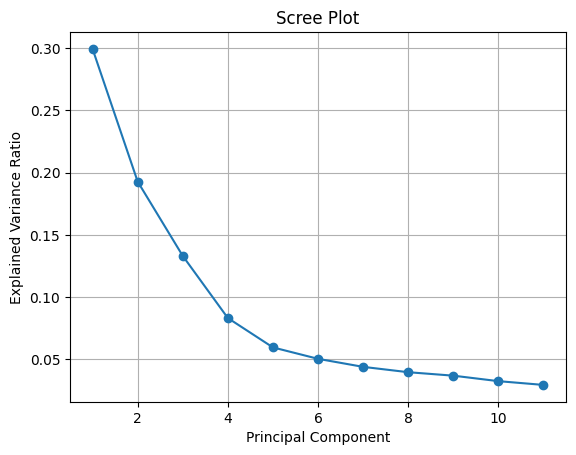

In [9]:
# Select the first 11 columns
selected_columns = df.iloc[:, 0:11]

# Convert "Yes" to 1 and other values to 0
MD_x = (selected_columns == "Yes").astype(int)

# Perform Principal Component Analysis (PCA)
pca = PCA()
pca.fit(MD_x)

# Summary of PCA results
standard_deviations = np.sqrt(pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
sdev =[]

# Print explained variance ratio and cumulative explained variance
for std_dev in standard_deviations:
    sdev.append(round(std_dev,4))

print("Standard Deviation: ")
print(sdev)
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

# You can also access principal components using pca.components_
# For example, to access the first principal component:
# first_principal_component = pca.components_[0]

# Create a scree plot to visualize explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


In [10]:
factor_loadings = pca.components_

# Print the factor loadings with one decimal place
print("Factor Loadings (Principal Component Loadings):")
print(np.round(factor_loadings, decimals=3))

Factor Loadings (Principal Component Loadings):
[[-0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214
   0.375]
 [ 0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077
  -0.14 ]
 [-0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192
  -0.089]
 [ 0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763
   0.37 ]
 [-0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288
  -0.729]
 [ 0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178
  -0.211]
 [-0.281 -0.06   0.708 -0.386  0.036 -0.087 -0.04   0.36  -0.068 -0.35
  -0.027]
 [ 0.013 -0.113  0.376  0.59  -0.138 -0.628  0.14  -0.073  0.03   0.176
  -0.167]
 [ 0.572 -0.018  0.4   -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186
  -0.072]
 [-0.11  -0.666 -0.076 -0.005  0.009  0.24   0.428  0.079  0.454 -0.038
  -0.29 ]
 [ 0.045 -0.542  0.142  0.251  0.002  0.339 -0.489  0.02  -0.49   0.158
  -0.041]]


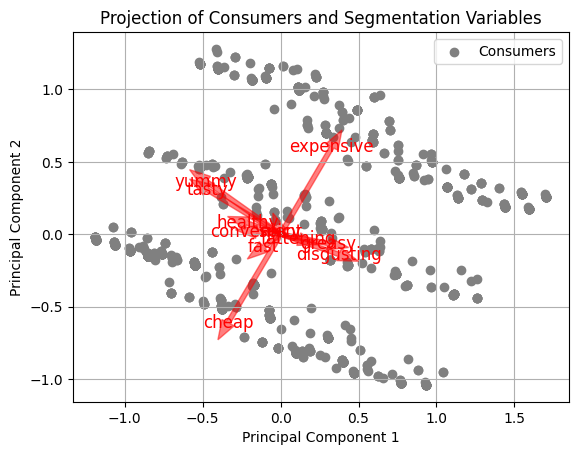

In [11]:
# Rotate and project data into the first two principal components
projected_data = pca.transform(MD_x)

# Create a scatter plot of the projected data (in grey)
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey', label='Consumers')

# Add arrows for the rotated and projected original segmentation variables
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5, width=0.03)
    plt.text(comp1, comp2, MD_x.columns[i], color='r', fontsize=12, ha='center', va='center')

# Set axis labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Set plot title
plt.title("Projection of Consumers and Segmentation Variables")
# Show the plot
plt.grid(True)
plt.legend()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

np.random.seed(1234)

# Range of cluster numbers (2 to 8)
n_clusters_range = range(2, 9)

# Number of random restarts
n_restarts = 10

# Initialize a dictionary to store clustering results
clustering_results = {}

# Iterate over the range of cluster numbers
for n_clusters in n_clusters_range:
    cluster_results = []

    # Perform K-Means clustering with multiple random restarts
    for _ in range(n_restarts):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=np.random.randint(0, 1000))
        labels = kmeans.fit_predict(MD_x)
        cluster_results.append(labels)

    clustering_results[n_clusters] = cluster_results

# Relabel segments to ensure consistency
def relabel_segments(cluster_labels):
    relabeled_labels = np.zeros_like(cluster_labels)
    unique_labels = np.unique(cluster_labels)

    for i, label in enumerate(unique_labels):
        relabeled_labels[cluster_labels == label] = i

    return relabeled_labels

# Create a dictionary to store relabeled clusterings
relabeled_clusters = {}

# Relabel the clusters
for n_clusters, cluster_labels_list in clustering_results.items():
    relabeled_clusters[n_clusters] = [relabel_segments(labels) for labels in cluster_labels_list]

# Now, relabeled_clusters contains the relabeled clustering results

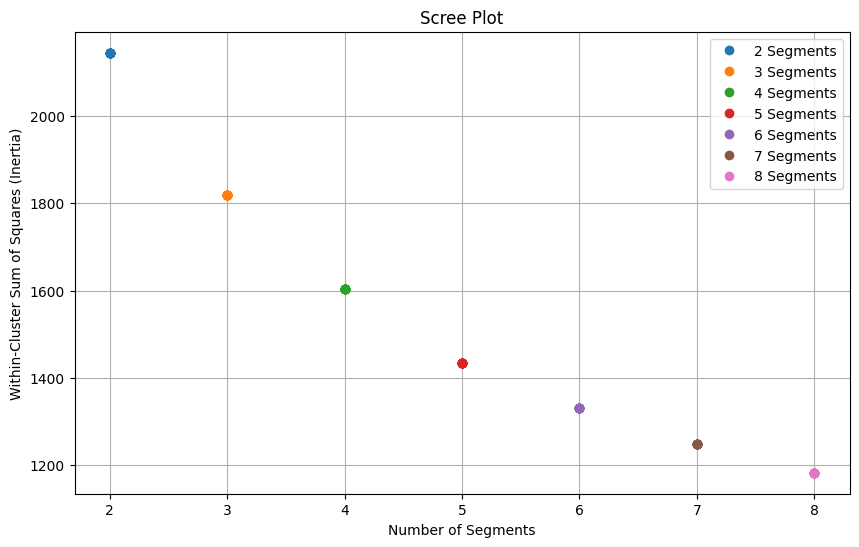

In [17]:
inertias = []
for n_clusters, cluster_labels_list in relabeled_clusters.items():
    cluster_inertias = []
    for labels in cluster_labels_list:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=1234)
        kmeans.fit(MD_x)
        cluster_inertias.append(kmeans.inertia_)
    inertias.append((n_clusters, cluster_inertias))

# Create a scree plot
plt.figure(figsize=(10, 6))
for n_clusters, cluster_inertia_list in inertias:
    plt.plot([n_clusters] * len(cluster_inertia_list), cluster_inertia_list, 'o', label=f'{n_clusters} Segments')

plt.xlabel("Number of Segments")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.title("Scree Plot")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from joblib import Parallel, delayed
from sklearn.utils import resample
# Set a random seed for reproducibility
np.random.seed(1234)

# Range of cluster numbers (2 to 8)
n_clusters_range = range(2, 9)

# Number of bootstrap samples and random initializations
n_bootstraps = 100
n_restarts = 10

# Initialize a dictionary to store global stability results
global_stability_results = {}

# Define a function to perform global stability analysis for a given cluster number
def perform_global_stability(n_clusters):
    stability_results = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(MD_x, replace=True, random_state=np.random.randint(0, 1000))
        cluster_results = []
        for _ in range(n_restarts):
            kmeans = KMeans(n_clusters=n_clusters, random_state=np.random.randint(0, 1000))
            labels = kmeans.fit_predict(bootstrap_sample)
            cluster_results.append(labels)
        stability_results.append(cluster_results)
    return stability_results

# Parallelize the global stability analysis for different cluster numbers
num_cores = -1  # Use all available CPU cores
global_stability_results = Parallel(n_jobs=num_cores)(
    delayed(perform_global_stability)(n_clusters) for n_clusters in n_clusters_range
)

# Now, global_stability_results contains the global stability analysis results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


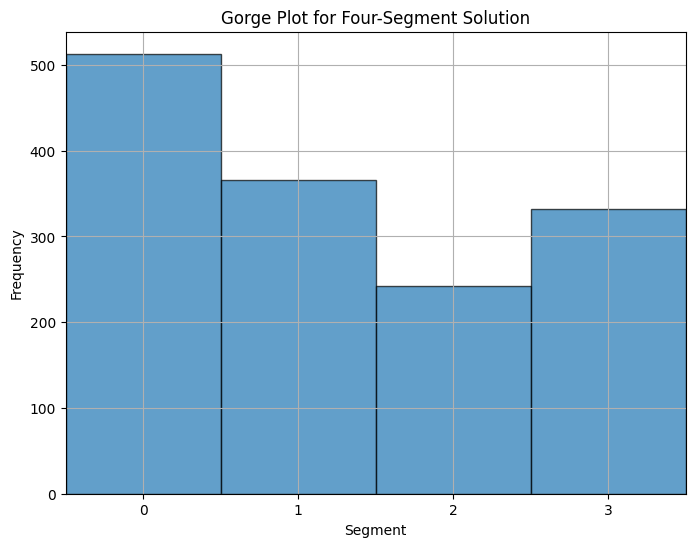

In [33]:
# Create a histogram using seaborn
n_clusters = 4

# Create a K-Means model and fit it to your data
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

plt.figure(figsize=(8, 6))
plt.hist(MD_k4, bins=np.arange(-0.5, 4.5, 1), edgecolor='black', alpha=0.7)
plt.xlabel("Segment")
plt.ylabel("Frequency")
plt.xticks(range(4))
plt.xlim(-0.5, 3.5)  # Adjust the x-axis limits
plt.title("Gorge Plot for Four-Segment Solution")
plt.grid(True)
plt.show()


In [40]:
df.shape

(1453, 15)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [42]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [44]:
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [45]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [46]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [47]:
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


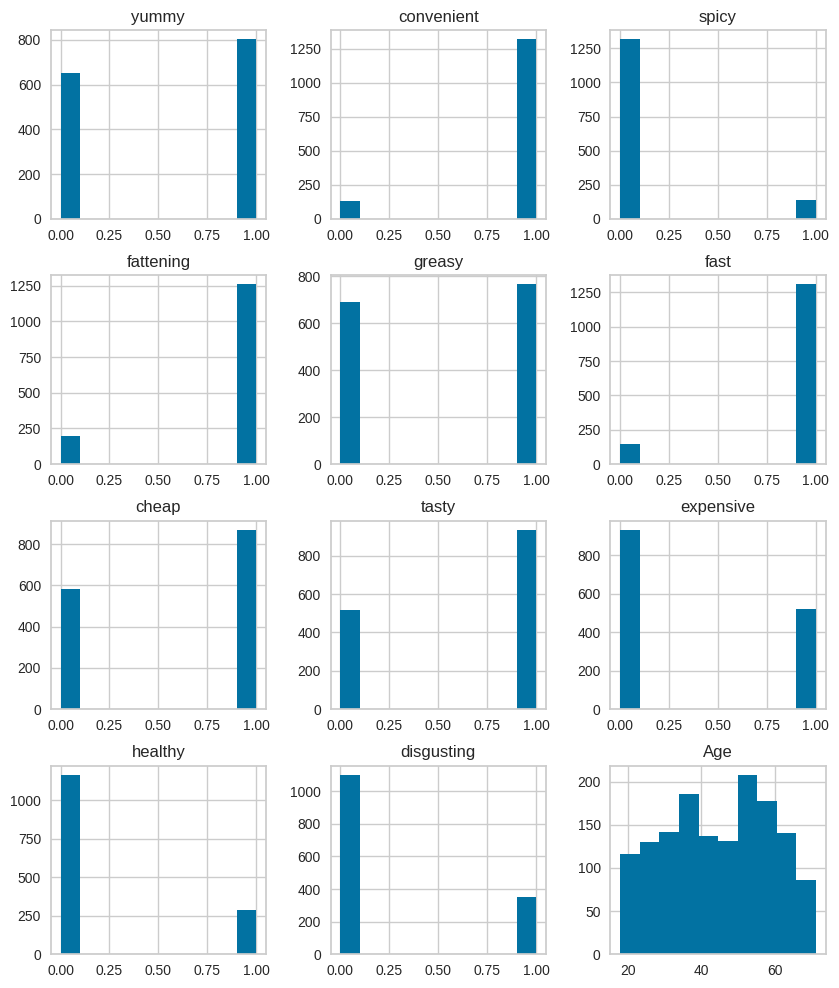

In [50]:
plt.rcParams['figure.figsize'] = (10,12)
df.hist()
plt.show()

In [51]:
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [52]:
X = df.loc[:,cat].values
X

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [53]:
pca_data = preprocessing.scale(X)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [54]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


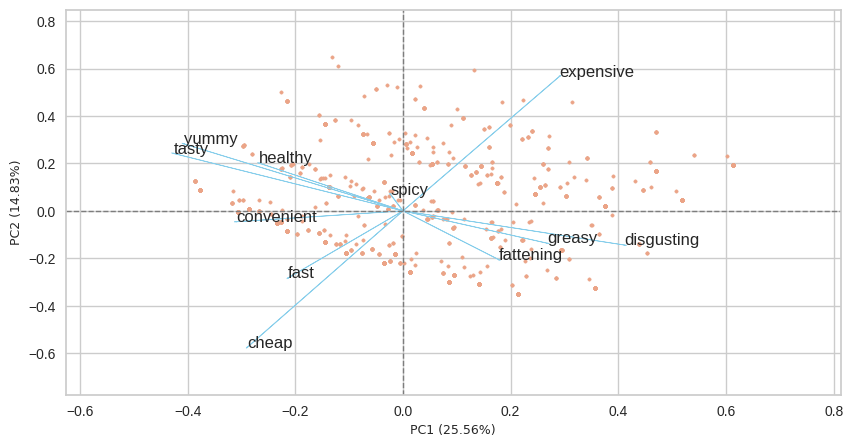

In [55]:
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

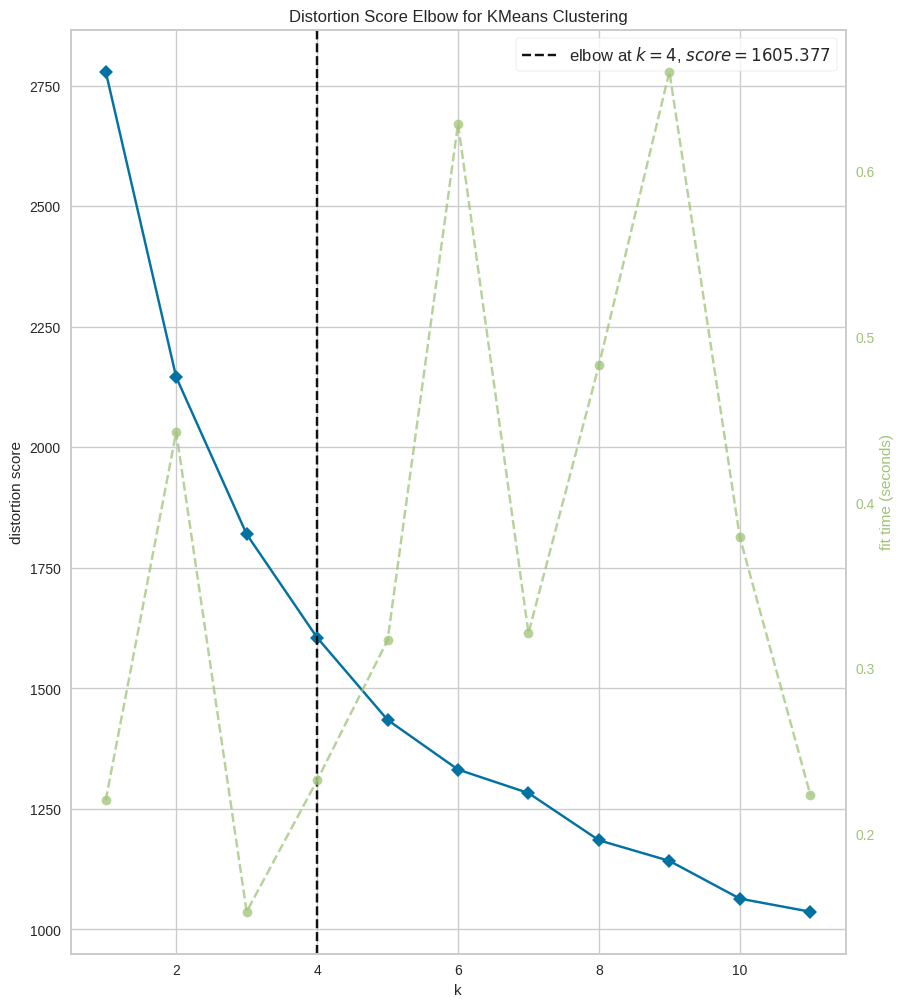

In [56]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show();

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558923
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


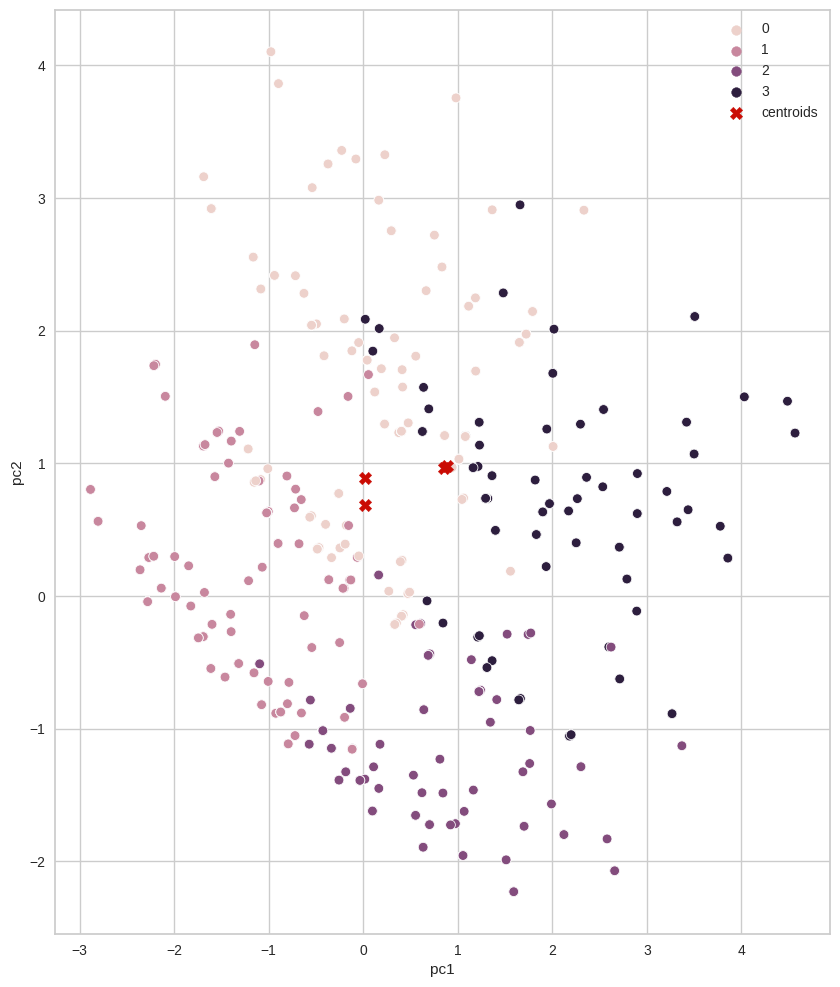

In [58]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

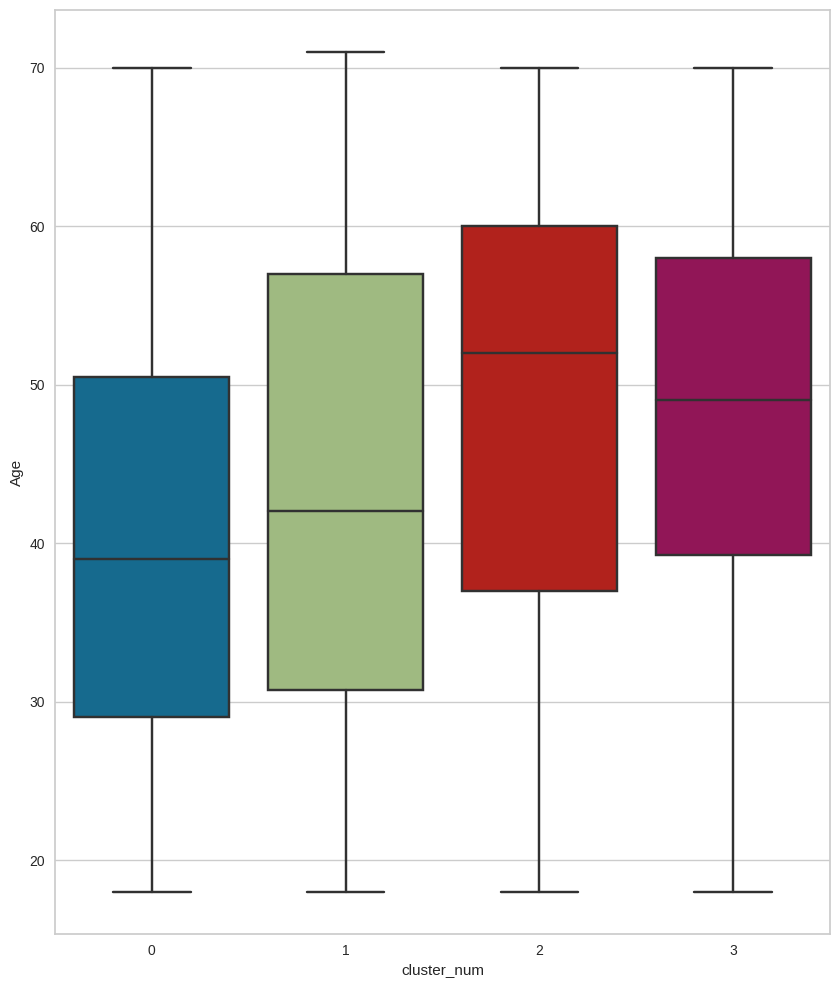

In [61]:
sns.boxplot(x="cluster_num", y="Age", data=df)

In [62]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


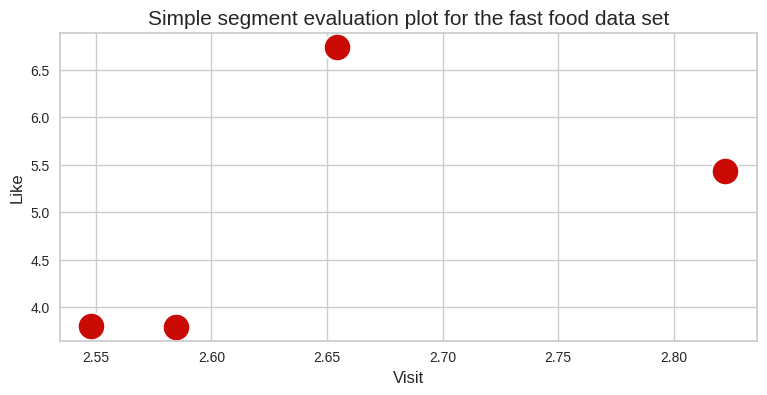

In [67]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()